# Data Analytics
In this section, we are going to dive into the dataset and do some analytics to check whether there are any patterns in postive and negative comments. The methods are listed as follows:

- Word cloud for positive and negative comments
- Topic models (LDA) for analytics
- (TODO) Clustering based on word embedding vector

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import pickle
import pandas as pd
from gensim import corpora
import gensim
import pyLDAvis.gensim
from wordcloud import WordCloud
import matplotlib.pyplot as plt


from topic_model_util import tokenize, get_lemma, get_lemma2, prepare_text_for_lda, get_tf

/opt/conda/lib/python3.7/site-packages/thinc/check.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import defaultdict, Sequence, Sized, Iterable, Callable
/opt/conda/lib/python3.7/site-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Load data
Load the training text and divide the comments into the postive and negative group. We find the number of comments in both groups is very balanced.

In [2]:
df = pd.read_csv('example_data/train.txt', sep='\t', header=None, names=['text', 'label'])
text_data = []
pos_words, neg_words = [], []
for row in df.itertuples():
    tokens = prepare_text_for_lda(row.text)
    if row.label == 1:
        pos_words += tokens
    else:
        neg_words += tokens
    text_data.append(tokens)

print(df.groupby('label').size().reset_index(name='count'))
print('\n')
print(df.iloc[0].text)
print(text_data[0])

   label  count
0      0    483
1      1    476


Wow... Loved this place.
['love', 'place']


In [3]:
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

if not os.path.exists('out'):
    os.mkdir('out')

pickle.dump(corpus, open('out/corpus.pkl', 'wb'))
dictionary.save('out/dictionary.gensim')

# Word Cloud
Create a word cloud to check the most frequent words in positve and negative comments.

### Positive comments

/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2347: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2364: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


(-0.5, 999.5, 499.5, -0.5)

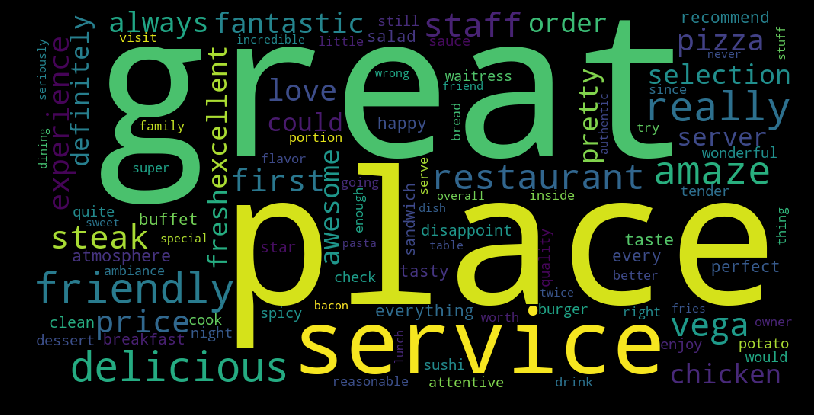

In [4]:
wc = WordCloud(width=1000, height=500, max_words=100).generate_from_frequencies(get_tf(pos_words))
fig = plt.figure(figsize=(14,7), facecolor='k')
plt.imshow(wc)
plt.axis("off")

### Negative Words

(-0.5, 999.5, 499.5, -0.5)

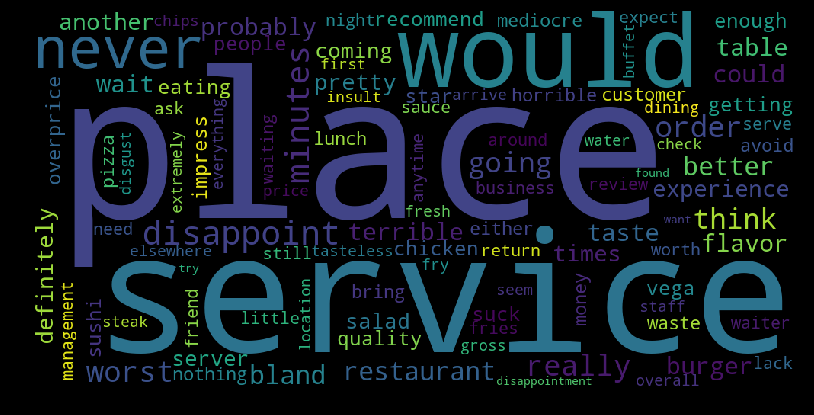

In [5]:
wc = WordCloud(width=1000, height=500, max_words=100).generate_from_frequencies(get_tf(neg_words))
fig = plt.figure(figsize=(14,7), facecolor='k')
plt.imshow(wc)
plt.axis("off")

# Topic Models: LDA

In [6]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)
ldamodel.save('out/model2.gensim')

### visualization

In [7]:
dictionary = gensim.corpora.Dictionary.load('out/dictionary.gensim')
corpus = pickle.load(open('out/corpus.pkl', 'rb'))

In [8]:
model2 = gensim.models.ldamodel.LdaModel.load('out/model2.gensim')
model2_display = pyLDAvis.gensim.prepare(model2, corpus, dictionary, sort_topics=True)
pyLDAvis.display(model2_display)